In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
team_df = pd.read_csv("./resources/data/pl_teams.csv")
season_df = pd.read_csv("./resources/data/pl_season.csv")
weather_df = pd.read_csv("./resources/data/city_weather.csv")

# Data Prep

In [3]:
# Convert weather data from F to C
weather_df['temp'] = (weather_df['temp'] - 32) * 5/9

In [4]:
# merging the team data and season data
df1 = pd.merge(season_df, team_df,  how='left', left_on='home_team_id',right_on = 'id')

# renaming the 'city' column
df1.rename(columns={'city':'home_city'}, inplace=True)

# merging the above dataframe and weather data
final_df = pd.merge(df1, weather_df, how='left', left_on=['date','home_city'], right_on = ['datetime','city'])

# creating a binary column indicating whether the home team won
final_df['home_team_won'] = (final_df['winner_name'] == final_df['home_team_name']).astype(int)

## Categorize Conditions

In [5]:
# Define a function to categorize temperature
def categorize_temp(temp):
    if temp <= 10:
        return 'Cold'
    elif 10 < temp <= 25:
        return 'Mild'
    else:
        return 'Hot'
    
final_df['temp_category'] = final_df['temp'].apply(categorize_temp)
    
# Define a function to categorize humidity
def categorize_humidity(humidity):
    if humidity <= 30:
        return 'Low'
    elif 30 < humidity <= 60:
        return 'Medium'
    else:
        return 'High'

final_df['humidity_category'] = final_df['humidity'].apply(categorize_humidity)

# Function to categorize precipitation
def categorize_precip(precip):
    if precip <= 0.1:
        return 'Low'
    elif 0.1 < precip <= 0.5:
        return 'Medium'
    else:
        return 'High'

final_df['precip_category'] = final_df['precip'].apply(categorize_precip)

# Function to categorize windspeed
def categorize_windspeed(windspeed):
    if windspeed <= 5:
        return 'Low'
    elif 5 < windspeed <= 10:
        return 'Medium'
    else:
        return 'High'

final_df['windspeed_category'] = final_df['windspeed'].apply(categorize_windspeed)

## Team Colours

In [6]:
team_colors = {
    'AFC Bournemouth': 'yellow',
    'Arsenal FC': 'maroon',
    'Aston Villa FC': 'maroon',
    'Brentford FC': 'olive',
    'Brighton & Hove Albion FC': 'DarkBlue',
    'Chelsea FC': 'darkgreen',
    'Crystal Palace FC': 'blue',
    'Everton FC': 'orange',
    'Fulham FC': 'black',
    'Leeds United FC': 'magenta',
    'Leicester City FC': 'cyan',
    'Liverpool FC': 'darkred',
    'Manchester City FC': 'lightblue',
    'Manchester United FC': 'red',
    'Newcastle United FC': 'gray',
    'Nottingham Forest FC': 'yellow',
    'Southampton FC': 'navy',
    'Tottenham Hotspur FC': 'purple',
    'West Ham United FC': 'lightgreen',
    'Wolverhampton Wanderers FC': 'gray',
}

# Analysis and Insights

## Table of Contents:
1. [How do weather conditions affect goals scored by home teams?](#1.) </br>
    1.1 [Visualizing Home Team Goals in Different Weather Conditions on Monthly Basis](#1.1) </br>
    1.2 [Correlation of Home Team Goals vs Weather conditions](#1.3) </br>
2. [How do weather conditions affect goals scored by home wins?](#2.) </br>
    2.1 [Home Team Wins in Different Weather Conditions on Monthly Basis](#2.1) </br>
    2.2 [Correlation of Home Team Wins vs Weather conditions](#2.2) </br>
3. [Home Team Wins Comparison in Specific Weather Category](#3.)

## 1. How do weather conditions affect goals scored by home teams? <a name="1."></a>


### 1.1 Visualizing Home Team Goals in Different Weather Conditions on Monthly Basis <a name="1.1"></a>

The function below visualizes monthly home team goals and average weather conditions on a dual-axis chart. The bars represent goals, while the line plot signifies weather conditions, highlighting potential correlations between goals scored and weather patterns

In [7]:
def plot_goals_vs_weather_monthly(final_df, weather_condition, color, ylabel):
    # Convert the 'datetime' column to datetime format
    final_df['datetime'] = pd.to_datetime(final_df['datetime'])

    # Group the data by month and calculate the total goals scored in each month
    monthly_goals_data = final_df.resample('M', on='datetime')['ft_score_home_team'].sum().reset_index()

    # Resample the data to monthly frequency and aggregate weather_condition
    monthly_weather_data = final_df.resample('M', on='datetime')[weather_condition].mean().reset_index()

    # Create the line chart with bars for total goals and a line for weather_condition
    fig, ax1 = plt.subplots(figsize=(10, 4))
    
    # Plot total goals as bars on the primary y-axis
    ax1.bar(monthly_goals_data['datetime'], monthly_goals_data['ft_score_home_team'], color=(0.2, 0.4, 0.6, 0.6), alpha=0.7, width=20)
    ax1.set_ylabel('Total Goals', color=(0.2, 0.4, 0.6, 0.6))
    ax1.tick_params(axis='y', labelcolor=(0.2, 0.4, 0.6, 0.6))

    # Create a secondary y-axis for the line plot
    ax2 = ax1.twinx()

    # Plot weather_condition as a line on the secondary y-axis
    ax2.plot(monthly_weather_data['datetime'], monthly_weather_data[weather_condition], color=color, linewidth=2)
    ax2.set_ylabel(ylabel, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Set labels and title
    plt.title('Total Goals vs. '+ ylabel + ' on a Monthly Basis')
    plt.xlabel('Date')

    # Format x-axis tick labels to display only month and year
    ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.show()

#### 1.1.1 Monthly Goals vs Average Temperature on Monthly Basis

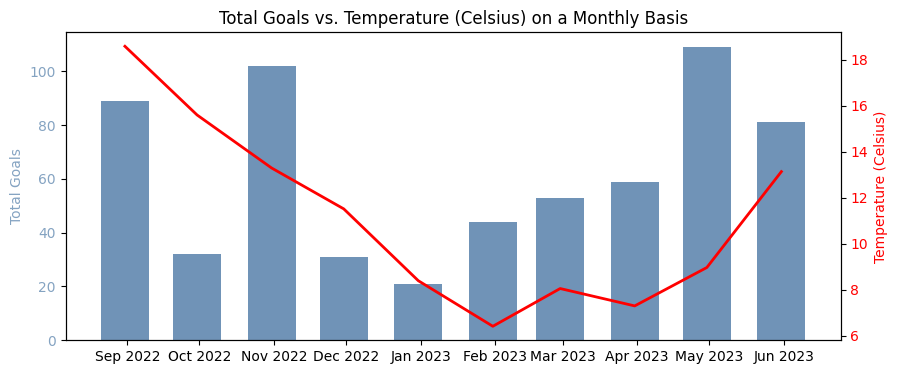

In [8]:
plot_goals_vs_weather_monthly(final_df, "temp", "red", "Temperature (Celsius)")

#### 1.1.2 Goals vs Average Humidity on Monthly Basis

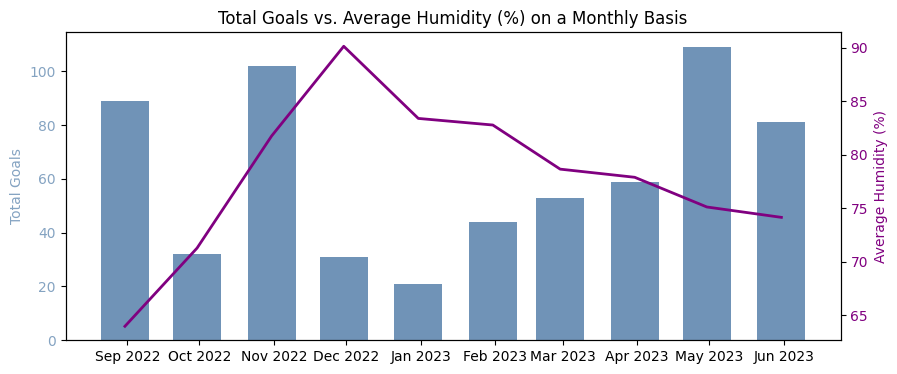

In [9]:
plot_goals_vs_weather_monthly(final_df, "humidity", "purple", "Average Humidity (%)")

#### 1.1.3 Goals vs Average Percipitation on Monthly Basis

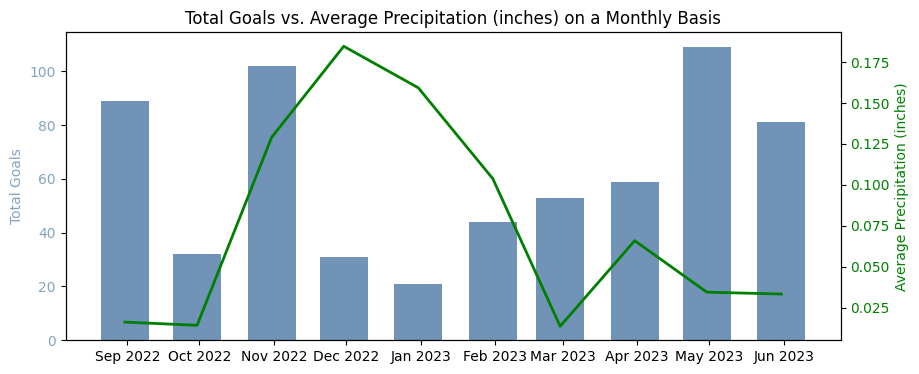

In [10]:
plot_goals_vs_weather_monthly(final_df, "precip", "green", "Average Precipitation (inches)")

### 1.1.4 Goals vs Average Wind Speed on Monthly Basis

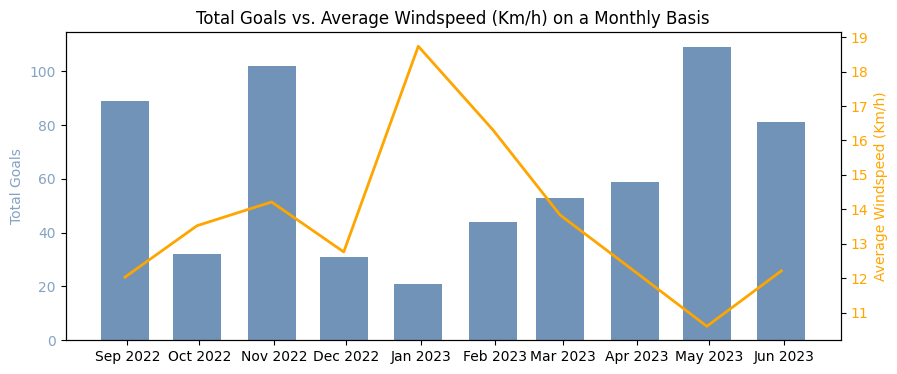

In [11]:
plot_goals_vs_weather_monthly(final_df, "windspeed", "orange", "Average Windspeed (Km/h)")

### 1.3 Correlation of Home Team Goals vs Weather conditions  <a name="1.3"></a>

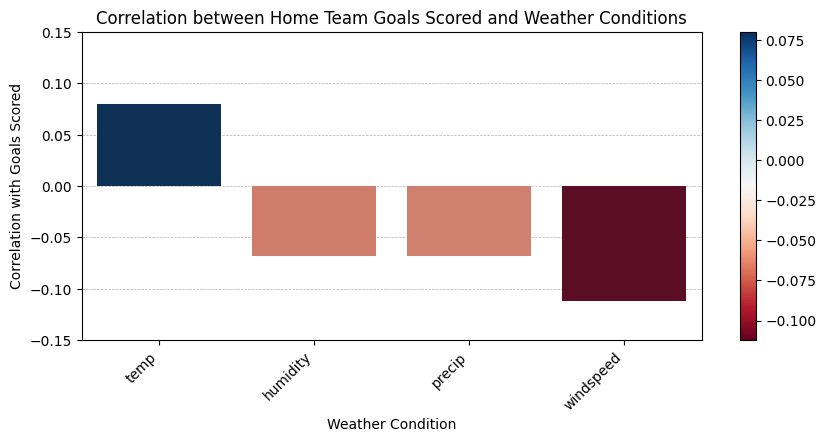

In [12]:
# List of weather conditions
weather_conditions = ['temp', 'humidity', 'precip', 'windspeed']

# Calculate correlation between weather conditions and goals scored
correlation_with_goals = final_df[weather_conditions].apply(lambda x: x.corr(final_df['ft_score_home_team']))

# Normalize the correlation values to the range [0,1]
norm = plt.Normalize(correlation_with_goals.values.min(), correlation_with_goals.values.max())
colors = plt.cm.RdBu(norm(correlation_with_goals.values)) 

# Create a figure and axes to visualize the correlations
fig, ax = plt.subplots(figsize=(10, 4))

# Ensure the grid is drawn behind other graph elements
ax.set_axisbelow(True)

sns.barplot(x=correlation_with_goals.index, y=correlation_with_goals.values, palette=colors, ax=ax)
ax.set_title('Correlation between Home Team Goals Scored and Weather Conditions')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Correlation with Goals Scored')
ax.set_ylim(-0.15, 0.15)  # Set the y-axis limits to show the full range of correlation (-1 to 1)
plt.xticks(rotation=45, ha='right')

# Add horizontal gridlines
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=norm)
fig.colorbar(sm, ax=ax)

plt.show()


### Conclusions

**Temperature** 🔥: Looks like a bit of heat brings out the goal-scorer in players. More heat, more goals! </br>
**Humidity** 💧: High humidity might make the ball a bit slippery, causing a tiny dip in the goals! </br>
**Precipitation** ☔: A drizzle here and there might cool down the score rate. </br>
**Wind Speed** 🌬️: Bit of a breeze? Well, lower scores seen on breezy days.

# 2. How do weather conditions affect goals scored by home wins?  <a name="2."></a>

### 2.1 Home Team Wins in Different Weather Conditions on Monthly Basis  <a name="2.1"></a>

In [13]:
def plot_home_wins_vs_weather_monthly(final_df, weather_condition, color, ylabel):
    # Convert the 'datetime' column to datetime format
    final_df['datetime'] = pd.to_datetime(final_df['datetime'])

    # Group the data by month and calculate the home team wins in each month
    monthly_wins_data = final_df.resample('M', on='datetime')['home_team_won'].sum().reset_index()

    # Resample the data to monthly frequency and aggregate weather_condition
    monthly_weather_data = final_df.resample('M', on='datetime')[weather_condition].mean().reset_index()

    # Create the line chart with bars for home team wins and a line for weather_condition
    fig, ax1 = plt.subplots(figsize=(10, 4))

    # Plot home team wins as bars on the primary y-axis
    ax1.bar(monthly_wins_data['datetime'], monthly_wins_data['home_team_won'], color=(0.2, 0.4, 0.6, 0.6), alpha=0.7, width=20)
    ax1.set_ylabel('Home Team Wins', color=(0.2, 0.4, 0.6, 0.6))
    ax1.tick_params(axis='y', labelcolor=(0.2, 0.4, 0.6, 0.6))

    # Create a secondary y-axis for the line plot
    ax2 = ax1.twinx()

    # Plot weather_condition as a line on the secondary y-axis
    ax2.plot(monthly_weather_data['datetime'], monthly_weather_data[weather_condition], color=color, linewidth=2)
    ax2.set_ylabel(ylabel, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Set labels and title
    plt.title('Home Team Wins vs. '+ ylabel + ' on a Monthly Basis')
    plt.xlabel('Date')

    # Format x-axis tick labels to display only month and year
    ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.show()


#### 2.1.1 Monthly Goals vs Average Temperature on Monthly Basis

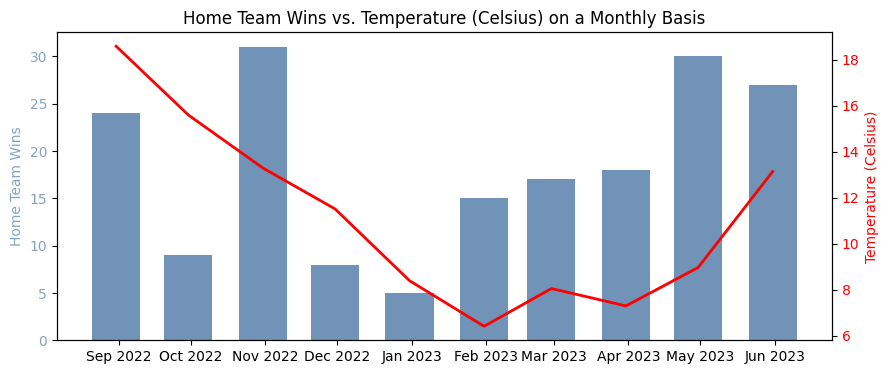

In [14]:
plot_home_wins_vs_weather_monthly(final_df, "temp", "red", "Temperature (Celsius)")

### 2.2 Correlation of Home Team Wins vs Weather conditions <a name="2.2"></a>

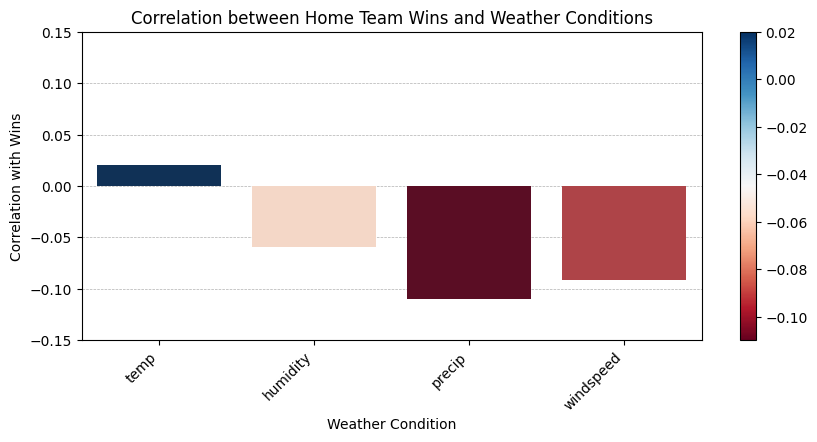

In [15]:
# Calculate correlation between weather conditions and home team wins
correlation_with_wins = final_df[weather_conditions].apply(lambda x: x.corr(final_df['home_team_won']))

# Normalize the correlation values to the range [0,1]
norm = plt.Normalize(correlation_with_wins.values.min(), correlation_with_wins.values.max())
colors = plt.cm.RdBu(norm(correlation_with_wins.values)) 

# Create a figure and axes to visualize the correlations
fig, ax = plt.subplots(figsize=(10, 4))

# Ensure the grid is drawn behind other graph elements
ax.set_axisbelow(True)

sns.barplot(x=correlation_with_wins.index, y=correlation_with_wins.values, palette=colors, ax=ax)
ax.set_title('Correlation between Home Team Wins and Weather Conditions')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Correlation with Wins')
ax.set_ylim(-0.15, 0.15)  # Set the y-axis limits to show the full range of correlation (-1 to 1)
plt.xticks(rotation=45, ha='right')

# Add horizontal gridlines
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=norm)
fig.colorbar(sm, ax=ax)

plt.show()


### Conclusions

**Temperature** 🔥: Hotter conditions slightly increase home team wins.</br>
**Humidity** 💧: Higher humidity slightly decreases home team wins.</br>
**Precipitation** ☔: Rainy conditions significantly reduce home team wins.</br>
**Wind Speed** 🌬️: Increased wind speed moderately reduces home team wins.</br>

## 3. Home Team Wins Comparison in Specific Weather Category <a name="3."></a>

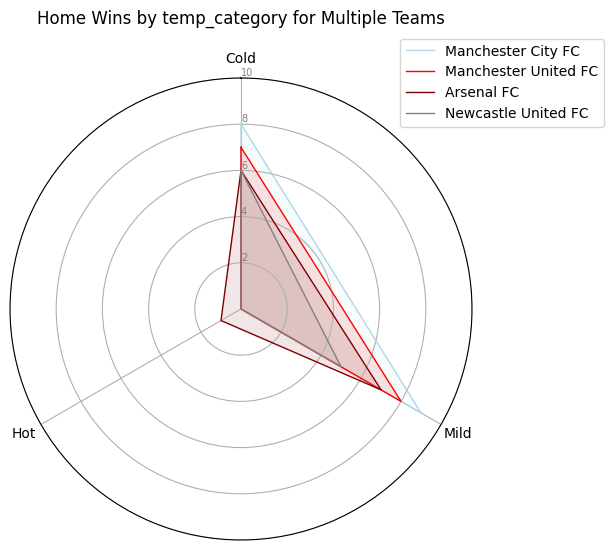

In [16]:
from math import pi

def plot_radar_chart(df, team_names, weather_category):
    # Prepare the figure
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Create ordering for weather categories
    temp_order = ['Cold', 'Mild', 'Hot']
    humidity_order = ['Medium', 'High']
    precip_order = ['Low', 'Medium', 'High']
    windspeed_order = ['Low', 'Medium', 'High']

    # Convert weather condition columns to ordered Categorical types so that they can be sorted in a meaningful order
    final_df['temp_category'] = pd.Categorical(final_df['temp_category'], categories=temp_order, ordered=True)
    final_df['humidity_category'] = pd.Categorical(final_df['humidity_category'], categories=humidity_order, ordered=True)
    final_df['precip_category'] = pd.Categorical(final_df['precip_category'], categories=precip_order, ordered=True)
    final_df['windspeed_category'] = pd.Categorical(final_df['windspeed_category'], categories=windspeed_order, ordered=True)

    for team_name in team_names:
        # Filter dataframe for the specified team's home games
        df_team = df[df['home_team_name'] == team_name]

        # Group by the specified weather category and sum the wins
        grouped = df_team.groupby(weather_category)['home_team_won'].sum()

        # Prepare data for radar chart
        labels = grouped.index
        values = grouped.values

        num_vars = len(labels)

        # Compute angle of each axis in the plot
        angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
        angles += angles[:1]

        # Draw one axe per variable + add labels
        plt.xticks(angles[:-1], labels)

        # Plot data
        values = list(values)
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=team_name, color=team_colors[team_name])

        # Fill area
        ax.fill(angles, values, team_colors[team_name], alpha=0.1)

    # Set ylim to 20 and set yticks
    ax.set_rlabel_position(0)
    plt.yticks([2, 4, 6, 8, 10], ["2", "4", "6", "8", "10"], color="grey", size=7)
    plt.ylim(0, 10)

    # Adjust the legend's position and add padding to the title
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title(f'Home Wins by {weather_category} for Multiple Teams', pad=20)

plot_radar_chart(final_df, ['Manchester City FC','Manchester United FC', 'Arsenal FC', 'Newcastle United FC'], 'temp_category')


# Improvements

1) For robust, conclusive results, expand the dataset to encompass multiple seasons
2) There can be a better way to get weather data for the cities

----------

# Extra Insights

# Top 3 Goal Scoring teams in different Temperatures Categories

In [17]:
def plot_top_teams_goals_by_weather_conditions(df, weather_category):
    weather_conditions = df[weather_category].unique()
    num_plots = len(weather_conditions)
    num_rows = num_plots // 2 + num_plots % 2  # Calculate the required number of rows
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 5 * num_rows))  # Adjust the figure size accordingly
    axes = axes.ravel()  # Flatten the array for easy iterating

    # Add condition to handle single subplot case
    if num_plots == 1:
        axes = [axes]

    for i, condition in enumerate(weather_conditions):
        df_filtered = df[df[weather_category] == condition]
        total_goals_per_team = df_filtered.groupby('home_team_name')['ft_score_home_team'].sum()

        # Get top 3 teams and sort in descending order
        top_3_teams = total_goals_per_team.nlargest(3).sort_values(ascending=True)

        # Create bar plot with default color
        bars = axes[i].barh(top_3_teams.index, top_3_teams, color='gray')  # Keep a reference to the bars

        axes[i].set_xlabel('Total Home Team Goals')
        axes[i].set_title(f'Top 3 Goal Scoring Teams in {condition} {weather_category[:-9]}')

        # Change bar colors based on team_colors dictionary
        for bar, team in zip(bars, top_3_teams.index):
            if team in team_colors:
                bar.set_color(team_colors[team])

        # Display goal values on the bars
        for j, v in enumerate(top_3_teams):
            axes[i].text(v, j, str(v), color='black', fontweight='bold')

    # Remove unused subplots
    if num_plots % 2:  # If there are an odd number of plots
        fig.delaxes(axes[-1])  # Remove the last axis

    plt.tight_layout()
    plt.show()

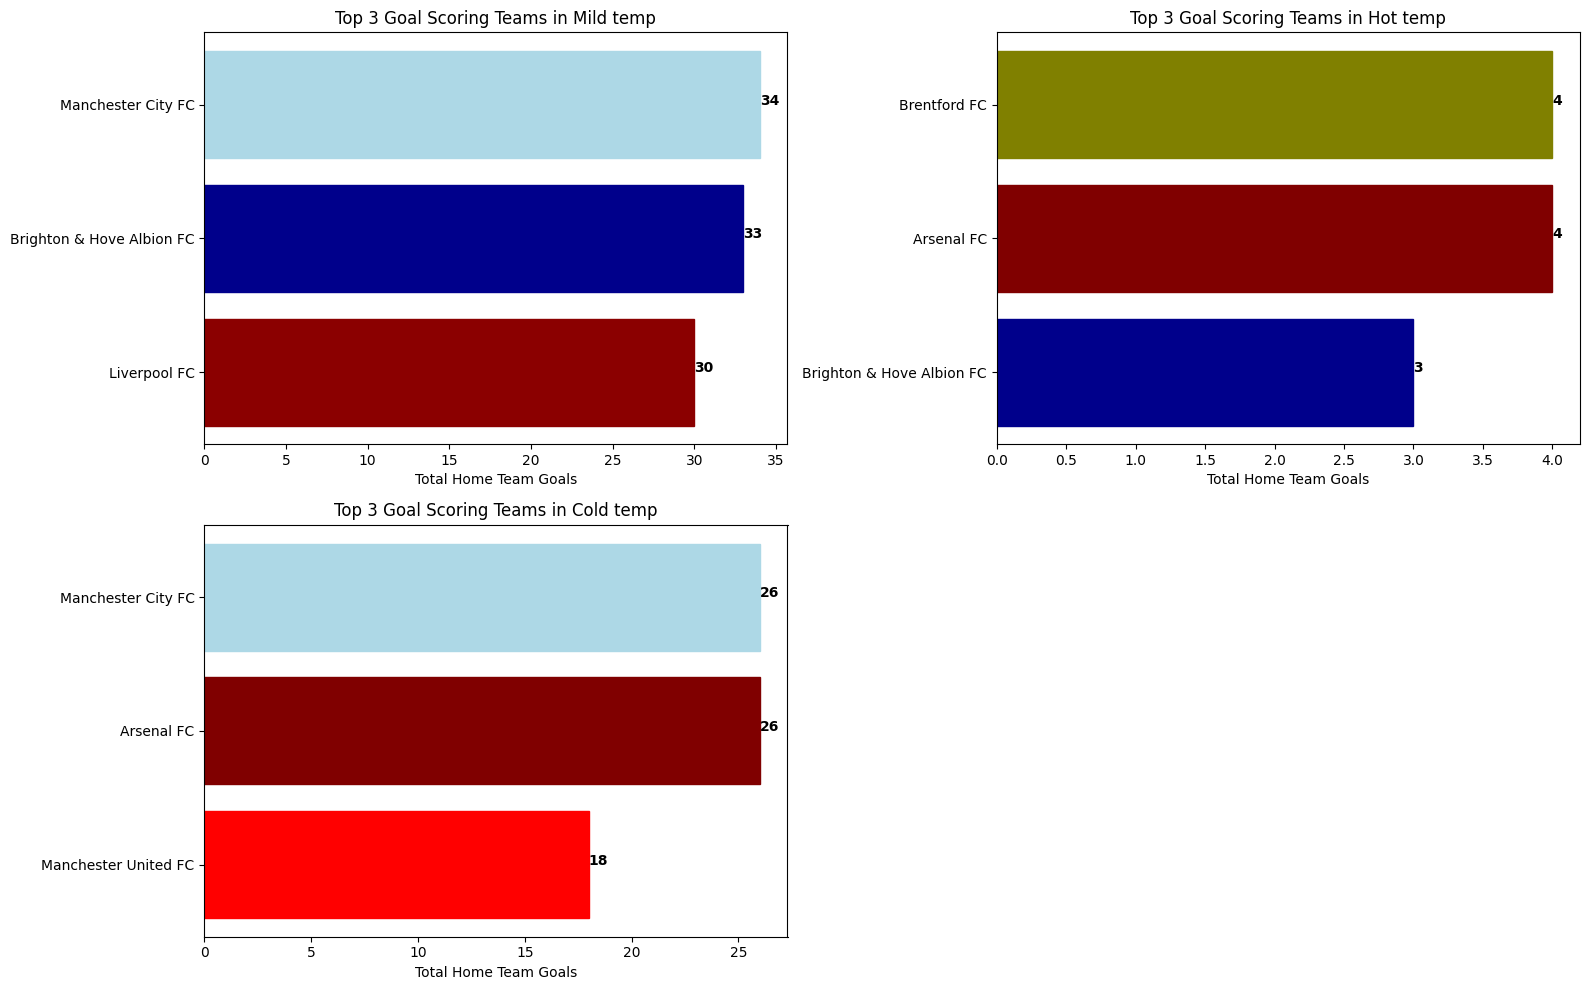

In [20]:
plot_top_teams_goals_by_weather_conditions(final_df, 'temp_category')

In [28]:
final_df.head()

,id_x,date,status,home_team_id,home_team_name,away_team_id,away_team_name,winner_name,ft_score_away_team,ft_score_home_team,id_y,name,shortName,address,home_city,datetime,temp,humidity,precip,windspeed,city,home_team_won,temp_category,humidity_category,precip_category,windspeed_category
0,416384,2022-08-05,FINISHED,354,Crystal Palace FC,57,Arsenal FC,Arsenal FC,2,0,354,Crystal Palace FC,Crystal Palace,Whitehorse Lane London SE25 6PU,London,2022-08-05,19.166667,41.3,0.000,11.6,London,0,Mild,Medium,Low,High
1,416383,2022-08-06,FINISHED,63,Fulham FC,64,Liverpool FC,DRAW,2,2,63,Fulham FC,Fulham,"Craven Cottage, Stevenage Road London SW6 6HH",London,2022-08-06,19.055556,44.1,0.000,7.0,London,0,Mild,Medium,Low,Medium
2,416378,2022-08-06,FINISHED,73,Tottenham Hotspur FC,340,Southampton FC,Tottenham Hotspur FC,1,4,73,Tottenham Hotspur FC,Tottenham,"Bill Nicholson Way, 748 High Road London N17 0AP",London,2022-08-06,19.055556,44.1,0.000,7.0,London,1,Mild,Medium,Low,Medium
3,416379,2022-08-06,FINISHED,67,Newcastle United FC,351,Nottingham Forest FC,Newcastle United FC,0,2,67,Newcastle United FC,Newcastle,Sports Direct Arena Newcastle upon Tyne NE1 4ST,Newcastle upon Tyne,2022-08-06,14.222222,71.8,0.001,17.5,Newcastle upon Tyne,1,Mild,High,Low,High
4,416381,2022-08-06,FINISHED,341,Leeds United FC,76,Wolverhampton Wanderers FC,Leeds United FC,1,2,341,Leeds United FC,Leeds United,Elland Road Leeds LS11 0ES,Leeds,2022-08-06,13.388889,74.1,0.000,10.8,Leeds,1,Mild,High,Low,High
